In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os

### Get IMG

In [ ]:
path = 'path/to/your/folder'
os.chdir(path)

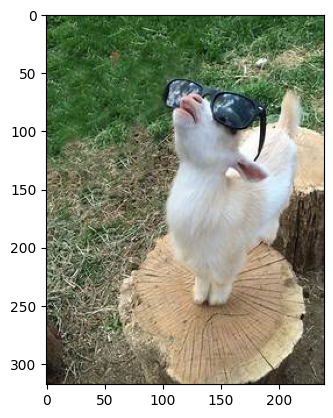

In [3]:
img = cv.imread('lama.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

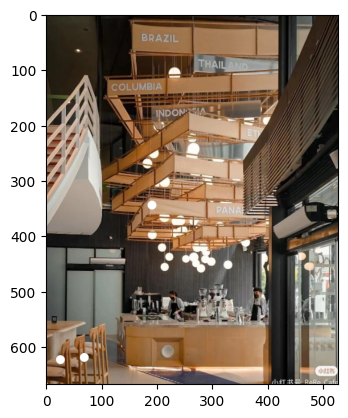

In [4]:
cf_img = cv.imread('cafeshop.png')
cf_img = cv.cvtColor(cf_img, cv.COLOR_BGR2RGB)
plt.imshow(cf_img)

### Các hàm gây nhiễu

In [5]:
def add_impulse_noise(image, prob):
    """
    Adds impulse (salt & pepper) noise to an image.

    Args:
    - image: Input image (numpy array).
    - prob: Probability of adding noise (0 < prob < 1).

    Returns:
    - noisy_img: Image with added noise.
    """
    # Create a copy of the original image to avoid modifying it directly
    noisy_img = image.copy()
    # Generate a random matrix with the same dimensions as the image
    random_matrix = np.random.rand(*image.shape[:2])

    # Add "salt" noise (white pixels)
    noisy_img[random_matrix < prob/2] = 255

    # Add "pepper" noise (black pixels)
    noisy_img[random_matrix > 1 - prob/2] = 0

    return noisy_img

In [6]:
def add_gaussian_noise(image, mean, sigma):
    """
    Adds Gaussian noise to an image.

    Args:
    - image: Input image (numpy array).
    - mean: Mean of the Gaussian distribution (default is 0).
    - sigma: Standard deviation of the Gaussian distribution (controls noise intensity).

    Returns:
    - noisy_img: Image with added Gaussian noise.
    """
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)

    # Add the Gaussian noise to the image
    noisy_img = image.astype(np.float32) + gaussian_noise

    # Clip pixel values to be in the valid range [0, 255]
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    return noisy_img

In [7]:
def add_speckle_noise(image, sigma):
    """
    Adds speckle noise to an image.

    Args:
    - image: Input image (numpy array).
    - sigma: Standard deviation of the speckle noise (controls noise intensity).

    Returns:
    - noisy_img: Image with added speckle noise.
    """
    # Convert the image to float32 for accurate calculations
    image = image.astype(np.float32) / 255.0

    # Generate speckle noise (multiplicative noise)
    noise = np.random.randn(*image.shape) * sigma

    # Add the speckle noise to the image
    noisy_img = image + image * noise

    # Clip pixel values to the range [0, 1] and convert back to uint8
    noisy_img = np.clip(noisy_img, 0, 1)
    noisy_img = (noisy_img * 255).astype(np.uint8)

    return noisy_img

In [8]:
def add_uniform_noise(img, noise_range):
    """
    Parameters:
        img (numpy.ndarray): Ảnh gốc (dạng mảng NumPy).
        noise_range (tuple): Khoảng giá trị nhiễu (min, max), thường nằm trong khoảng [-1, 1] nếu ảnh được chuẩn hóa.

    Returns:
        numpy.ndarray: Ảnh sau khi thêm nhiễu.
    """
    check = False
    # Kiểm tra nếu ảnh có giá trị pixel từ 0 đến 255 thì chuẩn hóa về [0, 1]
    if img.dtype == np.uint8:
        img = img / 255.0
        check = True

    # Tạo nhiễu uniform cùng kích thước với ảnh
    noise = np.random.uniform(low=noise_range[0], high=noise_range[1], size=img.shape)

    # Thêm nhiễu vào ảnh
    noisy_img = img + noise

    # Đảm bảo giá trị pixel nằm trong khoảng [0, 1]
    noisy_img = np.clip(noisy_img, 0, 1)

    if check == True:
        noisy_img = (noisy_img * 255).astype(np.uint8)

    return noisy_img

### **Lý thuyết về noise**

**1. Uniform noise là gì? Khác biệt giữa uniform noise và Gaussian noise là gì?**   
Uniform noise là 1 dạng nhiễu tuân theo phân phối đều, có nghĩa là xác suất mà các giá trị được chọn cho 1 pixel là như nhau. Và vì giá trị của pixel được chọn 1 cách ngẫu nhiên nên có thể làm nhòe chi tiết trên ảnh, dẫn đến việc nhận diện object hay border của 1 vật thể rất khó. Gaussian noise thì tuân theo phân phối Gaussian, và gaussian noise thì có ảnh hưởng nhẹ lên ảnh. Có thể hình dung là có 1 số pixel rải rác nhận giá trị random.

**2. Nêu một số ứng dụng thực tế của việc thêm noise vào dữ liệu hoặc ảnh trong lĩnh vực Machine Learning và Computer Vision.**
Thêm noise vào dữ liệu hoặc ảnh có ứng dụng như sau:
- Tạo thêm dữ liệu để train
- Cân bằng dữ liệu: Đối với các datasets gặp vấn đề mất cân bằng dữ liệu, việc thêm noise vào phần dữ liệu chiếm tỉ lệ ít hơn giúp cân bằng lại dữ liệu, tránh tình trạng overfitting.
- Giúp model tăng khả năng kháng nhiễu  

#### Thực hành với dữ liệu số

In [9]:
data = np.array([10, 20, 30, 40, 50])

def add_noise(data):
    # chuẩn hóa dữ liệu
    norm_data = (data - min(data))/(max(data) - min(data))
    print("Dữ liệu sau khi chuẩn hóa:", norm_data)

    # np.random.seed(123)
    noisy_data = add_uniform_noise(norm_data, noise_range=(-2, 2))
    print("Dữ liệu sau khi thêm nhiễu:", noisy_data)

add_noise(data)

Dữ liệu sau khi chuẩn hóa: [0.   0.25 0.5  0.75 1.  ]
Dữ liệu sau khi thêm nhiễu: [1. 1. 0. 1. 1.]


In [10]:
data2 = np.array([-.4, -.2, 0, 0.1, 0.4])
add_noise(data2)
data3 = np.array([-4, 2, 3, -1, 10])
add_noise(data3)

Dữ liệu sau khi chuẩn hóa: [0.    0.25  0.5   0.625 1.   ]
Dữ liệu sau khi thêm nhiễu: [0. 0. 0. 1. 1.]
Dữ liệu sau khi chuẩn hóa: [0.         0.42857143 0.5        0.21428571 1.        ]
Dữ liệu sau khi thêm nhiễu: [0.01248462 0.         0.03767914 1.         0.        ]


#### Thực hành với dữ liệu ảnh

In [11]:
def draw_histogram(img, subposition):
    color = ('b', 'g', 'r')
    plt.subplot(*subposition)
    for i, col in enumerate(color):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])

def show_img(img, img_noisy, noisy_type):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(img_noisy)
    plt.title(f'Image with {noisy_type} Noise')
    plt.axis('off')

    draw_histogram(img, (2, 2, 3))
    draw_histogram(img_noisy, (2, 2, 4))

    plt.show()

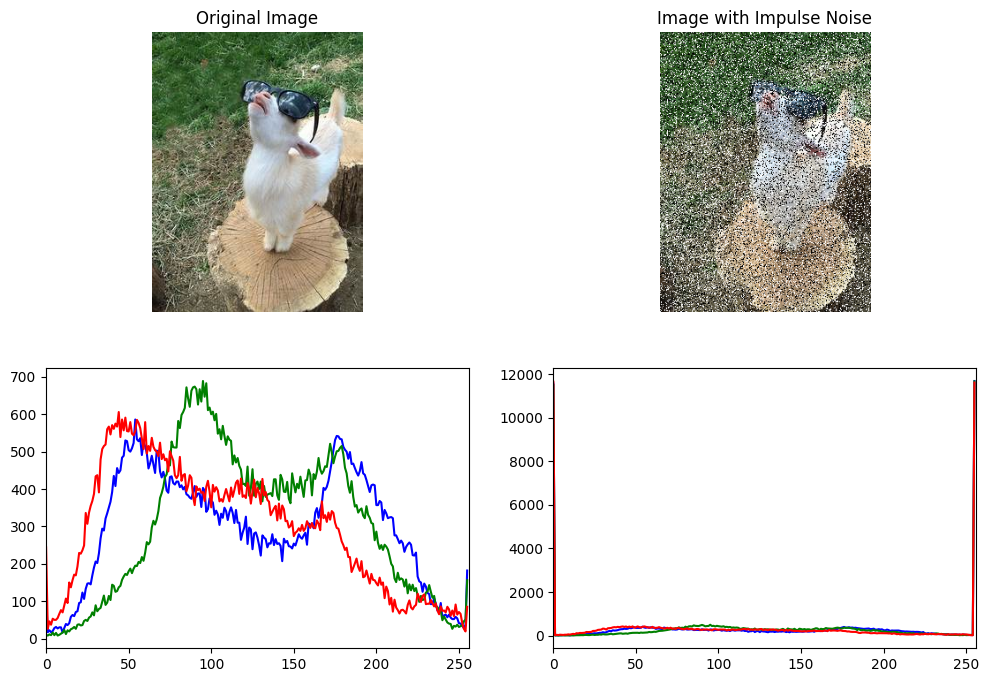

In [12]:
img_pluse = add_impulse_noise(img, 0.3)
show_img(img, img_pluse, "Impulse")

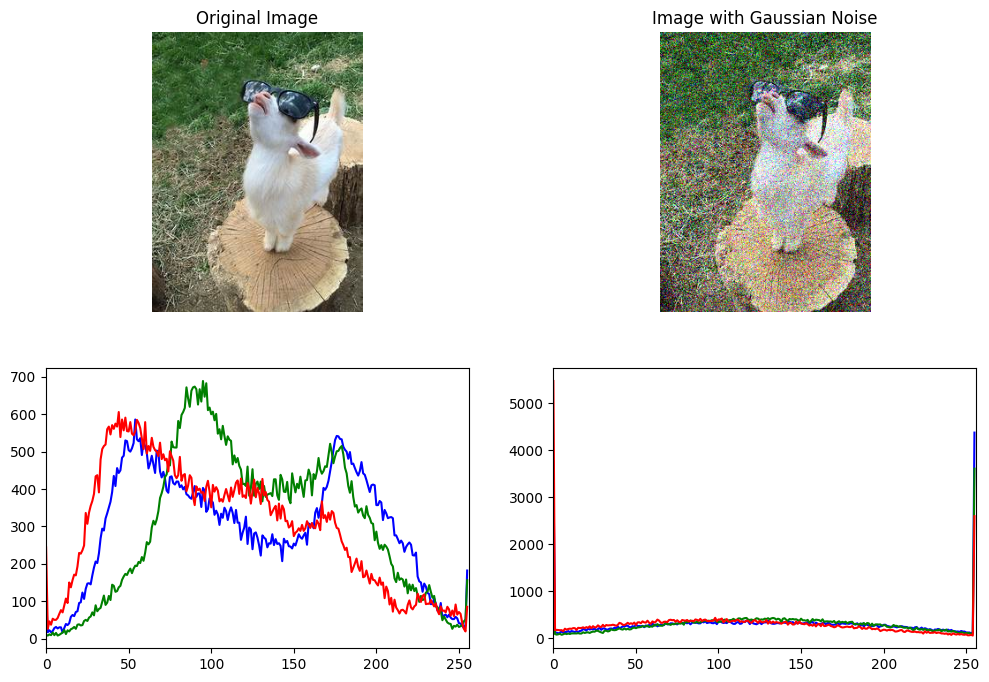

In [13]:
img_gaussian = add_gaussian_noise(img, mean=5, sigma=50)
show_img(img, img_gaussian, "Gaussian")

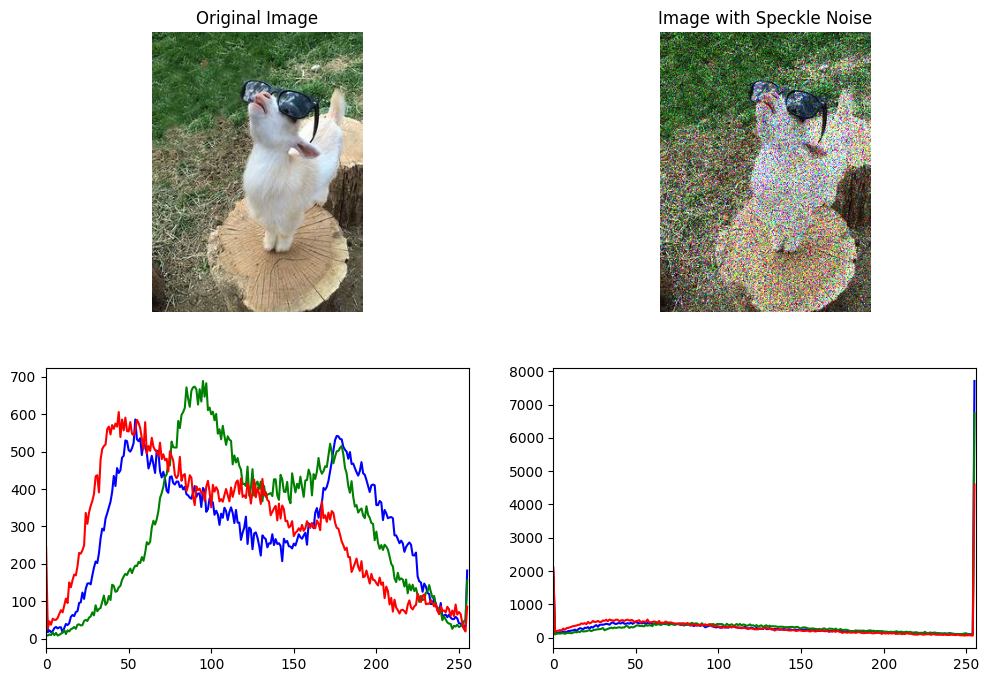

In [14]:
img_speckle = add_speckle_noise(img, sigma=0.5)
show_img(img, img_speckle, "Speckle")

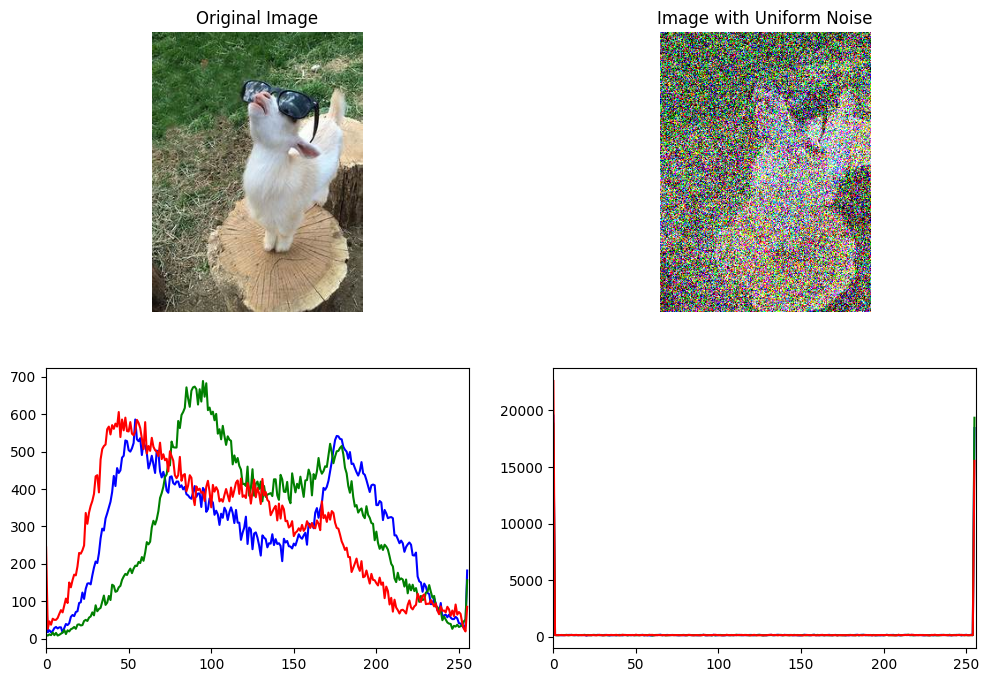

In [15]:
img_uniform = add_uniform_noise(img, noise_range=(-1, 1))
show_img(img, img_uniform, "Uniform")

Nhận xét: 
- Khi thay đổi các noise_parameters thì mức độ nhiễu của hình ảnh cũng thay đổi. Cụ thể hơn, mức độ nhiễu của hình ảnh tỉ lệ thuận với các tham số. 
- Dựa trên các histogram được vẽ, ta cũng nhận ra là histogram cho các hình được thêm nhiễu chứa nhiều pixel có giá trị là 0 và 255 (hay còn gọi là muối và tiêu). Khi tăng các noise_parameters thì số lượng muối và tiêu cũng tăng lên nhiều, và 1 ảnh bị nhiễu đến không nhận dạng được là khi histogram của nó gần như chứa 1 đường thẳng tiệm cận 0. 

### **Áp dụng bộ lọc tích chập và lọc ảnh**

#### Áp dụng các bộ lọc tích chập cơ bản

In [16]:
def apply_convolution_filter(image, kernel):
    """
    Apply a convolution filter to an image.

    Parameters:
    image (numpy array): Input color image.
    kernel (numpy array): Convolution kernel (filter) to apply.

    Returns:
    numpy array: Filtered color image.
    """
    # Apply the convolution filter to each color channel
    filtered_image = np.zeros_like(image)
    for c in range(3):  # Loop over B, G, R channels
        filtered_image[:, :, c] = cv.filter2D(image[:, :, c], -1, kernel)
    return filtered_image

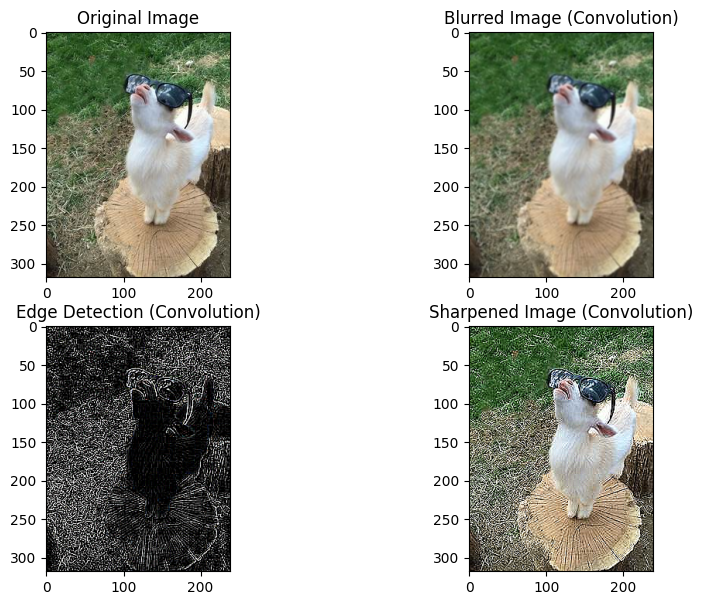

In [17]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

blur_kernel = np.ones((3, 3), np.float32) / 9

edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]], np.float32)

sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]], np.float32)

blurred_image = apply_convolution_filter(img, blur_kernel)
edge_image = apply_convolution_filter(img, edge_kernel)
sharpened_image = apply_convolution_filter(img, sharpen_kernel)

# Display the original and filtered images
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(blurred_image)
plt.title('Blurred Image (Convolution)')
plt.subplot(2, 2, 3)
plt.imshow(edge_image)
plt.title('Edge Detection (Convolution)')
plt.subplot(2, 2, 4)
plt.imshow(sharpened_image)
plt.title('Sharpened Image (Convolution)')
plt.show()

#### Bộ lọc Harmonic Mean và Geometric Mean

In [18]:
def harmonic_mean_filter(noisy_image, kernel_size):
    """
    Apply Harmonic Mean Filter to denoise an image channel-wise.

    Parameters:
    noisy_image (numpy array): Input noisy image (color).
    kernel_size (int): Size of the filter kernel. Default is 3.

    Returns:
    numpy array: Denoised color image.
    """
    # Initialize the output image with the same shape as the input
    denoised_image = np.zeros_like(noisy_image, dtype=np.float32)

    # Process each color channel separately
    for c in range(3):  # Loop over B, G, R channels
        # Padding to handle borders for each channel
        pad_size = kernel_size // 2
        padded_channel = cv.copyMakeBorder(noisy_image[:, :, c], pad_size, pad_size, pad_size, pad_size, cv.BORDER_REFLECT)

        # Traverse each pixel in the channel
        for i in range(pad_size, padded_channel.shape[0] - pad_size):
            for j in range(pad_size, padded_channel.shape[1] - pad_size):
                # Extract the local neighborhood (kernel window) for the current channel
                local_region = padded_channel[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]

                # Calculate harmonic mean in the kernel region, avoiding zero values to prevent division errors
                local_region = local_region.astype(np.float32)
                harmonic_mean = kernel_size * kernel_size / np.sum(1.0 / (local_region + 1e-10))

                # Assign the harmonic mean to the output image's channel
                denoised_image[i - pad_size, j - pad_size, c] = harmonic_mean

    # Convert the image back to 8-bit format
    denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

    return denoised_image

In [19]:
def geometric_mean_filter(noisy_image, kernel_size):
    """
    Apply Geometric Mean Filter to denoise an image channel-wise.

    Parameters:
    noisy_image (numpy array): Input noisy image (color).
    kernel_size (int): Size of the filter kernel. Default is 3.

    Returns:
    numpy array: Denoised color image.
    """
    # Initialize the output image with the same shape as the input
    denoised_image = np.zeros_like(noisy_image, dtype=np.float32)

    # Process each color channel separately
    for c in range(3):  # Loop over B, G, R channels
        # Padding to handle borders for each channel
        pad_size = kernel_size // 2
        padded_channel = cv.copyMakeBorder(noisy_image[:, :, c], pad_size, pad_size, pad_size, pad_size, cv.BORDER_REFLECT)

        # Traverse each pixel in the channel
        for i in range(pad_size, padded_channel.shape[0] - pad_size):
            for j in range(pad_size, padded_channel.shape[1] - pad_size):
                # Extract the local neighborhood (kernel window) for the current channel
                local_region = padded_channel[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]

                # Calculate geometric mean, avoiding zero values with a small epsilon
                local_region = local_region.astype(np.float32) + 1e-10
                geometric_mean = np.exp(np.sum(np.log(local_region)) / (kernel_size * kernel_size))

                # Assign the geometric mean to the output image's channel
                denoised_image[i - pad_size, j - pad_size, c] = geometric_mean

    # Convert the image back to 8-bit format
    denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

    return denoised_image

In [20]:
denoised_image1 = geometric_mean_filter(img_gaussian, kernel_size=3)
denoised_image2 = harmonic_mean_filter(img_gaussian, kernel_size=3)
denoised_image3 = geometric_mean_filter(img_gaussian, kernel_size=5)
denoised_image4 = harmonic_mean_filter(img_gaussian, kernel_size=5)

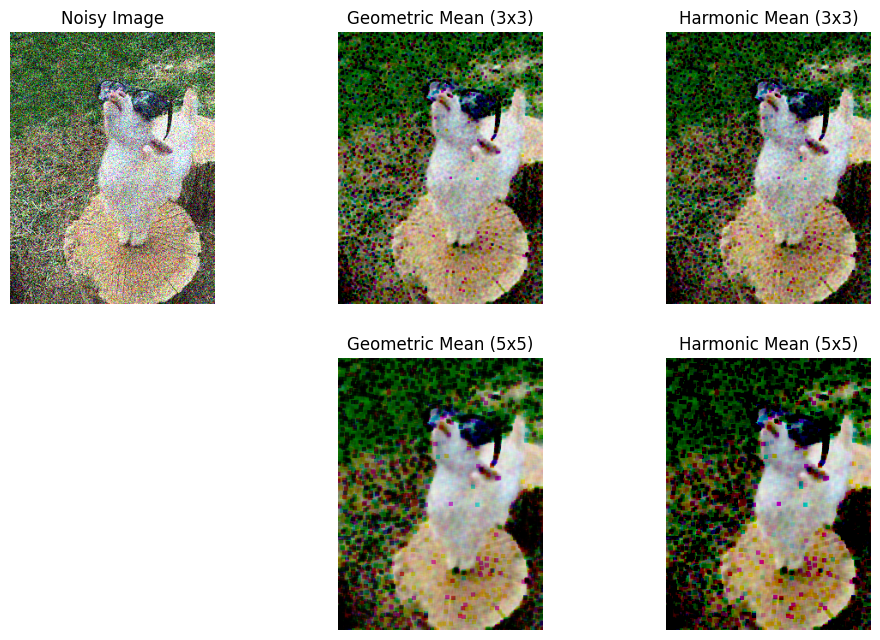

In [21]:
# display all denoised images in a grid layout (also with the noised image)
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.imshow(img_gaussian)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(denoised_image1)
plt.title('Geometric Mean (3x3)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(denoised_image2)
plt.title('Harmonic Mean (3x3)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(denoised_image3)
plt.title('Geometric Mean (5x5)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(denoised_image4)
plt.title('Harmonic Mean (5x5)')
plt.axis('off')

plt.show()

Nhận xét: Khử nhiễu với kernel 5x5 làm ảnh bị nhòe (blur) hơn so với kernel 3x3. Tuy nhiên thì cả 2 phương pháp khử nhiễu trên vẫn không hiệu quả khi vẫn chưa lọc được tiêu. 

### **Bài tập mở rộng**

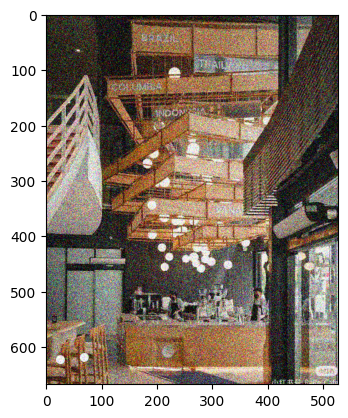

In [22]:
cf_img_noised = add_gaussian_noise(cf_img, mean=0, sigma=50)
plt.imshow(cf_img_noised)

In [23]:
denoised1 = geometric_mean_filter(cf_img_noised, kernel_size=3) 
denoised2 = harmonic_mean_filter(cf_img_noised, kernel_size=3)
denoised3 = apply_convolution_filter(cf_img_noised, blur_kernel) 

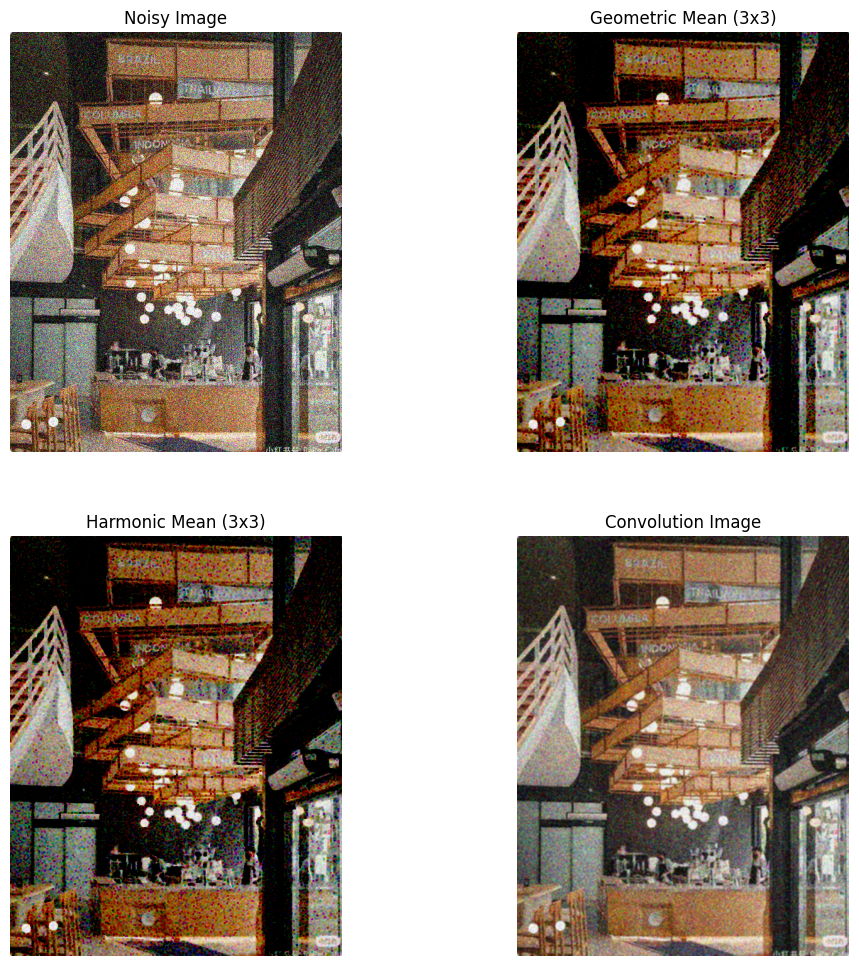

In [24]:
# display all denoised images in a grid layout (also with the noised image)
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(cf_img_noised)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(denoised1)
plt.title('Geometric Mean (3x3)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(denoised2)
plt.title('Harmonic Mean (3x3)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(denoised3)
plt.title('Convolution Image')
plt.axis('off')

plt.show()

Nhận xét: ta thấy được bộ lọc Harmonic và Geometric tăng độ tương phản cho ảnh, tuy có giảm nhiễu nhưng bức ảnh thu được bị tối và các chi tiết nhỏ như text không được xử lí tốt. Ben cạnh đó convolutional filter cũng có giảm nhiễu cho ảnh nhưng làm nhòe ảnh, nhưng các chi tiết nhỏ hay text vẫn có thể thấy được.

Nếu như sử dụng Harmonic và Geometric cho bức ảnh bị nhiễu nặng hơn, rất có khả năng là 2 bộ lọc này không hoạt động tốt

**Ý nghĩa các tham số của hàm fastNlMeansDenoisingColored:**
- src: Input ảnh màu 8-bit. 
- dst: Output image (có thể None).        
- h: Thông số điều chỉnh cường độ lọc. Giá trị h càng lớn thì khử nhiễu tốt hơn những cũng làm mất chi tiết trên ảnh.
- hForColorComponents: Tương tự như h nhưng chỉ dành cho ảnh màu. Đối với hầu hết các hình ảnh, nên đặt nó bằng h.   
- templateWindowSize: kernel size, recommended value is 7.         
- searchWindowSize: Recommended value is 21.

**So sánh Denoising và Filtering:** cả hai đều là những kỹ thuật được sử dụng trong xử lý hình ảnh để cải thiện chất lượng hình ảnh, nhưng chúng phục vụ các mục đích khác nhau và được thực hiện bằng các phương pháp khác nhau. Dưới đây là những khác biệt chính giữa Denoising và Filtering:

Denoising: Khử nhiễu nhằm mục đích loại bỏ nhiễu khỏi hình ảnh trong khi vẫn giữ được các chi tiết quan trọng như cạnh và kết cấu.

Filtering: Lọc là một thuật ngữ rộng hơn bao gồm các hoạt động khác nhau được áp dụng cho hình ảnh để đạt được các hiệu ứng khác nhau, chẳng hạn như làm mịn, làm sắc nét, phát hiện cạnh và giảm nhiễu.        
Các kỹ thuật phổ biến:          
Lọc Gaussian: Bộ lọc làm mịn giúp giảm nhiễu và chi tiết bằng cách lấy trung bình các giá trị pixel bằng nhân Gaussian.         
Lọc Sobel: Bộ lọc phát hiện cạnh làm nổi bật các cạnh trong hình ảnh.       
Lọc Laplacian: Một bộ lọc phát hiện cạnh khác sử dụng toán tử Laplacian để tìm các vùng có cường độ thay đổi nhanh.     
Lọc tích chập: Áp dụng kernel (bộ lọc) cho hình ảnh để đạt được các hiệu ứng khác nhau như làm mờ, làm sắc nét, v.v.